# Assignment 2: Machine Learning

You have 10 days to work on a machine learning algorithm. I want you to pick one of the following use cases and 
make a prediction algorithm using either regression or classification algorithms.

Do the following:

    Pick one use case (defined below).
    Explore and research which algorithm would work best for this use case (regression or classification)
    Document your findings in a ReadMe.md file (3-5 lines) on why you chose this algorithm.
    Code the algorithm using Python
    Keep the solution as simple as possible. We are not looking for the best machine learning algorithm. 
    We are interested in seeing that you know how to work with machine learning.
    Publish the code on GitHub and send us the link

You can pick one of the following use cases:

    Predict stock market price for Norwegian airlines. I want you to make a prediction algorithm which predicts the price of this stock on a specific date. Input will be date and output should be price of that stock (close value in the data file). You should also show the predction percentage score. Data file: NAS.csv



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [2]:
def date_to_ordinal(date):
    
    date = pd.to_datetime(date) 
    
    return (date - df['Date'].min())  / np.timedelta64(1,'D')

In [3]:
def ordinal_to_date(ordinal):
    
    return np.timedelta64(int(ordinal),'D') + df['Date'].min()

### Importerer data og gjør datoene om til datetime-objekter

In [4]:
df = pd.read_csv('NAS.csv', parse_dates = ['Date'])

### Fjerner nullverdier 

In [5]:
df = df.loc[~(df.isna().any(axis = 1))].reset_index(drop = True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0
...,...,...,...,...,...,...,...
4213,2020-10-12,0.709000,0.710000,0.650000,0.676800,0.676800,48320475.0
4214,2020-10-13,0.676800,0.676800,0.600000,0.600600,0.600600,47786200.0
4215,2020-10-14,0.601000,0.640000,0.596200,0.626000,0.626000,37534949.0
4216,2020-10-15,0.626000,0.626000,0.585000,0.605000,0.605000,26737615.0


In [6]:
from sklearn.model_selection import train_test_split

y = df['Close'].copy()
X = df.Date.apply(date_to_ordinal).to_frame()
X['Date^2'] = X**2
X['Date^3'] = X.Date**3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
from sklearn.linear_model import LinearRegression
                       
regObj = LinearRegression()
regObj.fit(X_train.values.reshape(-1,3), y_train.values.reshape(-1,1))

LinearRegression()

In [8]:
pred_y = regObj.predict(X_test.values.reshape(-1,3))

In [9]:
res = pd.DataFrame(X_test)
res['predy'] = pred_y

In [10]:
res

,Date,Date^2,Date^3,predy
463,676.0,456976.0,3.089158e+08,22.103154
2426,3533.0,12482089.0,4.409922e+10,128.127366
2661,3878.0,15038884.0,5.832079e+10,139.588461
1483,2161.0,4669921.0,1.009170e+10,57.084804
2927,4268.0,18215824.0,7.774514e+10,145.543703
...,...,...,...,...
288,421.0,177241.0,7.461846e+07,29.400738
1432,2090.0,4368100.0,9.129329e+09,53.484515
2059,2994.0,8964036.0,2.683832e+10,102.506661
2868,4185.0,17514225.0,7.329703e+10,145.005962


<IPython.core.display.Javascript object>


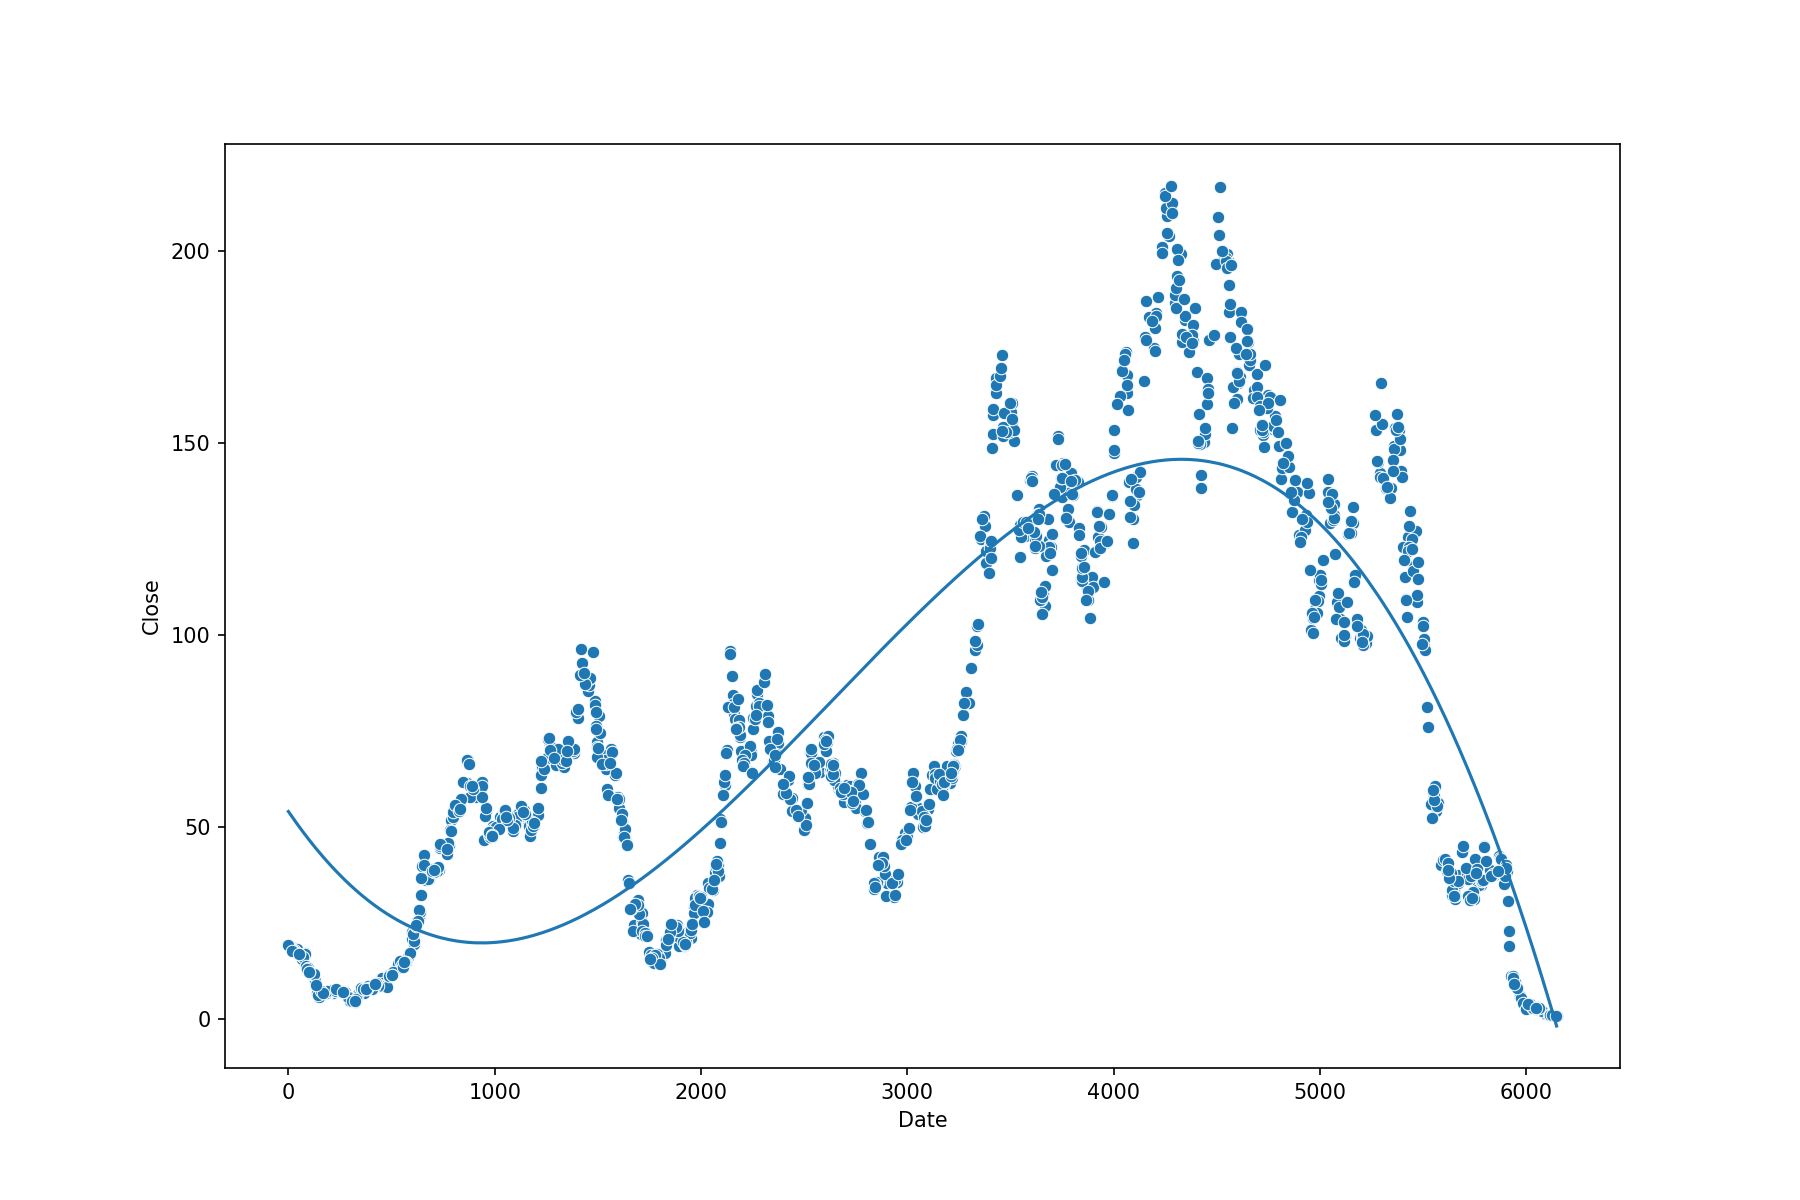

<AxesSubplot:xlabel='Date', ylabel='Close'>

In [11]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'Date', y = y_test, data = walla)
sns.lineplot(x = 'Date', y = 'predy', data = walla)

In [15]:
def make_prediction(date):
    date = date_to_ordinal(date)
    date_squared = date ** 2
    date_cubed = date ** 3

    return regObj.predict([date, date_squared, date_cubed])

In [ ]:
make_prediction('2014-')